In [ ]:
from google.colab import drive
drive.mount('/content/drive')

Mounted at /content/drive


In [ ]:
import os
import numpy as np
import cv2
import random
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Conv2D, MaxPooling2D, Flatten, Dense, Dropout
from tensorflow.keras.utils import to_categorical
from sklearn.model_selection import train_test_split
import matplotlib.pyplot as plt

In [ ]:
def load_data(dataset_path, img_size=(128, 128), images_per_class=10):
    X, y = [], []
    class_names = sorted(os.listdir(dataset_path))
    class_indices = {name: idx for idx, name in enumerate(class_names)}

    for label in class_names:
        class_path = os.path.join(dataset_path, label)
        image_files = [f for f in os.listdir(class_path) if f.lower().endswith(('.jpg', '.png', '.bmp'))]

        selected_files = random.sample(image_files, min(images_per_class, len(image_files)))

        for file in selected_files:
            path = os.path.join(class_path, file)
            img = cv2.imread(path)
            if img is None:
                continue
            img = cv2.resize(img, img_size)
            X.append(img)
            y.append(class_indices[label])

    X = np.array(X, dtype='float32') / 255.0
    y = to_categorical(y)
    return X, y, class_names

In [ ]:
dataset_path = "/content/drive/MyDrive/105_classes_pins_dataset"
X, y, class_names = load_data(dataset_path)
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

In [ ]:
model = Sequential([
    Conv2D(32, (3, 3), activation='relu', input_shape=(128, 128, 3)),
    MaxPooling2D((2, 2)),
    Conv2D(64, (3, 3), activation='relu'),
    MaxPooling2D((2, 2)),
    Flatten(),
    Dense(128, activation='relu'),
    Dropout(0.5),
    Dense(len(class_names), activation='softmax')
])

model.compile(optimizer='adam', loss='categorical_crossentropy', metrics=['accuracy'])
model.summary()

Model: "sequential_1"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━┓
┃ Layer (type)                    ┃ Output Shape           ┃       Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━┩
│ conv2d_2 (Conv2D)               │ (None, 126, 126, 32)   │           896 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ max_pooling2d_2 (MaxPooling2D)  │ (None, 63, 63, 32)     │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ conv2d_3 (Conv2D)               │ (None, 61, 61, 64)     │        18,496 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ max_pooling2d_3 (MaxPooling2D)  │ (None, 30, 30, 64)     │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ flatten_1 (Flatten)             │ (None, 57600)          │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_2 (Dense)                 │ (None, 128)            │     7,372,928 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dropout_1 (Dropout)             │ (None, 128)            │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_3 (Dense)                 │ (None, 106)            │        13,674 │
└─────────────────────────────────┴────────────────────────┴───────────────┘

 Total params: 7,405,994 (28.25 MB)

 Trainable params: 7,405,994 (28.25 MB)

 Non-trainable params: 0 (0.00 B)

In [ ]:
history = model.fit(X_train, y_train, epochs=20, batch_size=32,
                    validation_data=(X_test, y_test))

Epoch 1/20
27/27 ━━━━━━━━━━━━━━━━━━━━ 8s 156ms/step - accuracy: 0.0151 - loss: 5.3453 - val_accuracy: 0.0143 - val_loss: 4.6668
Epoch 2/20
27/27 ━━━━━━━━━━━━━━━━━━━━ 1s 21ms/step - accuracy: 0.0103 - loss: 4.6612 - val_accuracy: 0.0048 - val_loss: 4.6600
Epoch 3/20
27/27 ━━━━━━━━━━━━━━━━━━━━ 1s 18ms/step - accuracy: 0.0117 - loss: 4.6463 - val_accuracy: 0.0143 - val_loss: 4.6644
Epoch 4/20
27/27 ━━━━━━━━━━━━━━━━━━━━ 1s 18ms/step - accuracy: 0.0127 - loss: 4.6055 - val_accuracy: 0.0143 - val_loss: 4.6288
Epoch 5/20
27/27 ━━━━━━━━━━━━━━━━━━━━ 1s 19ms/step - accuracy: 0.0516 - loss: 4.4605 - val_accuracy: 0.0238 - val_loss: 4.6538
Epoch 6/20
27/27 ━━━━━━━━━━━━━━━━━━━━ 1s 19ms/step - accuracy: 0.1070 - loss: 4.1406 - val_accuracy: 0.0190 - val_loss: 4.6672
Epoch 7/20
27/27 ━━━━━━━━━━━━━━━━━━━━ 1s 19ms/step - accuracy: 0.1700 - loss: 3.6857 - val_accuracy: 0.0190 - val_loss: 4.8306
Epoch 8/20
27/27 ━━━━━━━━━━━━━━━━━━━━ 1s 18ms/step - accuracy: 0.3028 - loss: 2.9739 - val_accuracy: 0.0190 - 

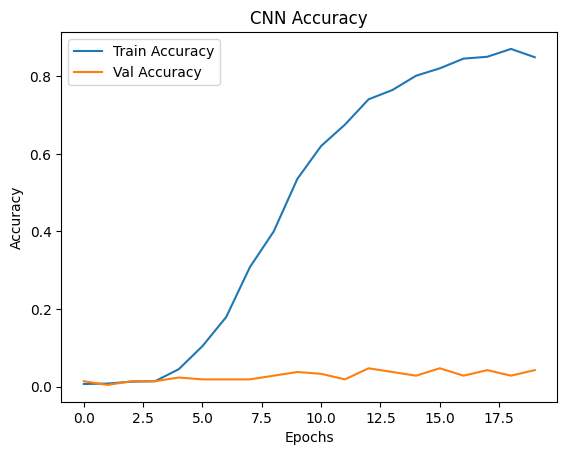

In [ ]:
plt.plot(history.history['accuracy'], label='Train Accuracy')
plt.plot(history.history['val_accuracy'], label='Val Accuracy')
plt.legend()
plt.title("CNN Accuracy")
plt.xlabel("Epochs")
plt.ylabel("Accuracy")
plt.show()